In [ ]:
# This is a test to check that the rhs is correctly calculated for a (non trivial) BH spacetime

# restart the kernel to clear past work
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [1]:
# load the required python modules
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import time
import random
import sys
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

# homemade code
sys.path.append('../source')
from initialdata.mytests import *                   # go here to change the test conditions
from matter.nomatter import *                       # the matter class to be used
from backgrounds.sphericalbackground import *       # go here to look at the background hat metric and scalings
from core.grid import Grid                          # go here to see how the grid and derivatives are calculated
from core.spacing import *                          # go here to import spacing
from core.display import set_grid_on_ax             # to make plots look nice
from core.statevector import *                      # helps construct the state vector with the matter
from core.rhsevolution import *                     # go here to look at how the evolution works
from bssn.tensoralgebra import *                    # some useful tensor algebra functions
from bssn.constraintsdiagnostic import *                    # go here to change the  diagnostics

In [2]:
# Set up the chosen matter class
scalar_mu = 1.0
my_matter = NoMatter()
my_state = StateVector(my_matter)

# Input parameters for grid and evolution here
r_max = 8 # outer edge of the grid (including ghosts)
min_dr = 1/64
max_dr = 1/8

# SinhSpacing
# params = SinhSpacing.get_parameters(r_max, min_dr, max_dr)
# my_spacing = SinhSpacing(**params)

# CubicSpacing
params = CubicSpacing.get_parameters(r_max, min_dr, max_dr)
my_spacing = CubicSpacing(**params)

# Set up the grid and the background
grid = Grid(my_spacing, my_state)
r = grid.r
num_points = r.size
my_background = FlatSphericalBackground(r)

print("Grid params are", params)

Grid params are {'r_max': 8, 'extent': <SpacingExtent.HALF: 0>, 'a': 0.9071147352221454, 'num_points': 158}


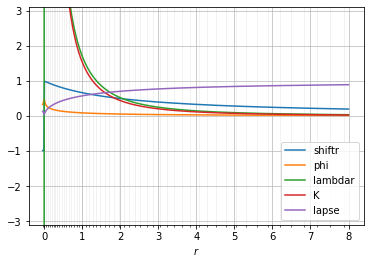

In [3]:
# Test the rhs values, use eddington finkelstein which has non trivial Kij and shift
initial_state = get_test_state_bh(grid, my_background)

# unpackage the vector for readability
[phi,hrr,htt,hpp,K,arr,att,app,lambdar,shiftr,br,lapse] = np.array_split(initial_state, grid.NUM_VARS)

#plot initial conditions
plt.xlabel('r')
plt.plot(r, shiftr, label='shiftr')
plt.plot(r, phi, label='phi')
#plt.plot(r, hrr, label='hrr')
#plt.plot(r, htt, label='htt')
plt.plot(r, lambdar, label='lambdar')
#plt.plot(r, arr, label='arr')
plt.plot(r, K, label='K')
plt.plot(r, lapse, label='lapse')
plt.ylim(-3.1,3.1)
#plt.xlim(-0.5,1.5)
plt.legend(loc='best')
ax = plt.gcf().gca()
set_grid_on_ax(ax, r)

#print(r,K)

  0%|                                                                  | 0/1000 [00:00<?, ?‰/s]

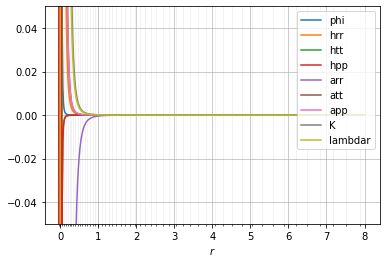

In [4]:
# calculate the rhs values and plot them
progress_bar = tqdm(total=1000, unit="‰")
solution = get_rhs(0.0, initial_state, grid, my_background, my_matter, progress_bar, [0, 1])

#unpackage the vector for readability
[phi,hrr,htt,hpp,K,arr,att,app,lambdar,shiftr,br,lapse] = np.array_split(solution, grid.NUM_VARS)

#plot rhs - all those for the metric components should be zero modulo boundary issues and the inner singularity
plt.xlabel('r')
plt.plot(r, phi, label='phi')
plt.plot(r, hrr, label='hrr')
plt.plot(r, htt, label='htt')
plt.plot(r, hpp, label='hpp')
plt.plot(r, arr, label='arr')
plt.plot(r, att, label='att')
plt.plot(r, app, label='app')
plt.plot(r, K, label='K')
plt.plot(r, lambdar, label='lambdar')
# Lapse and shift won't have zero time derivs, but just useful to test
#plt.plot(r, lapse, label='lapse')
#plt.plot(r, shiftr, label='shift')
plt.ylim(-0.05,0.05)
#plt.xlim(0.15,0.9)
plt.legend(loc='best')
ax = plt.gcf().gca()
set_grid_on_ax(ax, r)

(-0.1, 0.1)

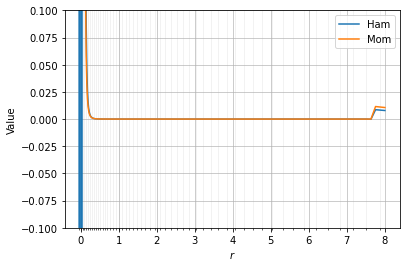

In [5]:
# check the constraints initially satisfied
Ham_test, Mom_test = get_constraints_diagnostic(initial_state, np.array([0]), grid, my_background, my_matter)

# plot the profile for Ham
plt.plot(r, Ham_test[0], label = "Ham")
Mom = np.sqrt(Mom_test[0,:,i_r]**2 + Mom_test[0,:,i_t]**2 + Mom_test[0,:,i_p]**2)
plt.plot(r, Mom, label = "Mom")

plt.legend()
plt.xlabel('r')
plt.ylabel('Value')
ax = plt.gcf().gca()
set_grid_on_ax(ax, r)
#plt.xlim(-0.5,R+2)
plt.ylim(-0.1,0.1)